
## Multiclass Classification Project
Learning Goals

- How to read different size images from a directory?
- How to implement One-vs-one scheme for Multiclass classification?
- How to use SVM for image classifcation?

In [172]:
import numpy as np
import os
from pathlib import Path 
from keras.preprocessing import image

### Dataset preparation

In [173]:
p = Path('dataset')
dirs = p.glob('*')
label_dict ={'cat':0,'dog':1,'horse':2,'human':3}
image_data = []
labels =[]
for folder in dirs:
    #print(folder)
    label = str(folder).split('\\')[-1][:-1]
    #print(label)
    for img_path in folder.glob('*.jpg'):
        print(img_path)
        img = image.load_img(img_path,target_size=(32,32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])


dataset\cats\cat.1.jpg
dataset\cats\cat.10.jpg
dataset\cats\cat.100.jpg
dataset\cats\cat.101.jpg
dataset\cats\cat.102.jpg
dataset\cats\cat.103.jpg
dataset\cats\cat.104.jpg
dataset\cats\cat.105.jpg
dataset\cats\cat.106.jpg
dataset\cats\cat.107.jpg
dataset\cats\cat.108.jpg
dataset\cats\cat.109.jpg
dataset\cats\cat.11.jpg
dataset\cats\cat.110.jpg
dataset\cats\cat.111.jpg
dataset\cats\cat.112.jpg
dataset\cats\cat.113.jpg
dataset\cats\cat.114.jpg
dataset\cats\cat.115.jpg
dataset\cats\cat.116.jpg
dataset\cats\cat.117.jpg
dataset\cats\cat.118.jpg
dataset\cats\cat.119.jpg
dataset\cats\cat.12.jpg
dataset\cats\cat.120.jpg
dataset\cats\cat.121.jpg
dataset\cats\cat.122.jpg
dataset\cats\cat.123.jpg
dataset\cats\cat.124.jpg
dataset\cats\cat.125.jpg
dataset\cats\cat.126.jpg
dataset\cats\cat.127.jpg
dataset\cats\cat.128.jpg
dataset\cats\cat.129.jpg
dataset\cats\cat.13.jpg
dataset\cats\cat.130.jpg
dataset\cats\cat.131.jpg
dataset\cats\cat.132.jpg
dataset\cats\cat.133.jpg
dataset\cats\cat.134.jpg
datase

In [174]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [175]:
print(len(labels))

808


In [176]:
print(len(image_data))

808


In [177]:
# Convert the data into numpy array
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)

In [178]:
print(image_data.shape)

(808, 32, 32, 3)


In [179]:
print(labels.shape)

(808,)


### Shuffle the data

In [180]:
import random

In [181]:
# combine the image and label together
combined = list(zip(image_data,labels))
random.shuffle(combined)

#unzip the data after shuffling
image_data[:],labels[:]= zip(*combined)# * is used to unzip the data


### Visualize the data

In [182]:
import matplotlib.pyplot as plt

In [183]:
def draw_img(img):
    plt.imshow(img)


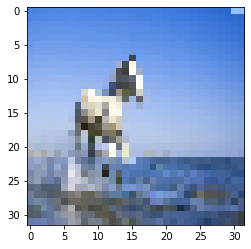

In [187]:
draw_img(image_data[80])

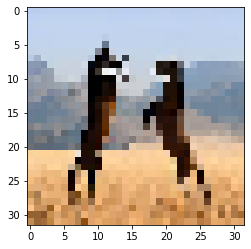

In [189]:
draw_img(image_data[14])

now data is suffled

In [190]:
### SVM Classifier

In [191]:
class SVM:
    def _init_(self,C=1.0):
        self.C = C
        self.W= 0
        self.b= 0
    def hingeLoss(self,W,b,x,y):
        loss = 0.0
        c=1.0
        loss+=0.5*np.dot(W,W.T)
        m = x.shape[0]
        
        for i in range(m):
            ti = y[i]*(np.dot(W,x[i].T)+b)
           # maxi = max(0,1-ti)
            loss += c *max(0,(1-ti))
        return loss[0][0]
    def fit(self,X,Y,batch_size=100,learning_rate =0.001,maxItr = 300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        c=1.0
        n = learning_rate
        #c = self.C
        #initailise the model parameter
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #initial loss
        print(self.hingeLoss(W,bias,X,Y))
        losses = []
        #training
        #weight and bias update rule
        
        for i in range(maxItr):
            l = self.hingeLoss(W,bias,X,Y)
            print(l)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #batch gradient
            for batches in range(0,no_of_samples,batch_size):
                #assume grad is 0
                gradw =0
                gradb =0
                for j in range(batches,batches+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =Y[i]*(np.dot(W,X[i].T)+bias)
                        if ti>1:
                            gradw +=0
                            gradb +=0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                #gradient is ready
                W = W - n*W + n*gradw
                bias = bias + n*gradb
        self.W = W
        self.bias = bias
        return W,bias,losses

In [192]:
### We need to convert data for one vs one classifier

In [193]:
print(image_data.shape)

(808, 32, 32, 3)


In [194]:
no_of_sample = image_data.shape[0]

In [195]:
image_data=image_data.reshape(no_of_sample,-1)

In [196]:
print(image_data.shape)

(808, 3072)


808 is no of images and 3072 is no of features per image

In [197]:
no_of_classes = len(np.unique(labels))
print(no_of_classes)

4


In [198]:
def class_wise_data(x,y):
    data ={} #dict
    for i in range(no_of_classes):
        data[i] =[] # emptylist
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [199]:
data = class_wise_data(image_data,labels)

In [200]:
data[0].shape[0]

202

In [201]:
data[1].shape[0]


202

In [202]:
data[2].shape[0]


202

In [203]:
data[3].shape[0]

202

In [204]:
# get data pair
def get_data_pair(d1,d2):
    # combine data of 2 classes into single matrix
    l1,l2 = d1.shape[0],d2.shape[0]
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels

### Training nC2 SVM's Part

404.0
404.0
403.2685332038648
402.5371076065437
401.8057263451411
401.0743751200247
400.3430935602405
399.6118562792329
398.8806696854121
398.1495096444231
397.4183902810092
396.6873316587085
395.95630228225036
395.4677079100158
394.7693874023693
394.2655949246743
393.82166262067346
393.3966951964165
392.9342074033324
392.5540488964507
392.07618990489135
391.7550145422767
391.1500420530754
390.81382518907657
390.73229135729656
390.00810229650773
389.3925431875133
388.9584692125258
388.6751561551372
388.19483700296774
387.6430240164323
387.2167053136271
386.7635991334263
386.5316162035276
386.34449976504425
385.5694151556663
385.1555050825355
385.1505112872281
384.71454243792044
384.0351886153128
383.5592594019318
383.18999753791184
382.8070904035217
382.377084578151
382.0444773749546
381.63081828028044
381.2399655136801
380.7935899029444
380.3917913593863
380.2480228954719
379.82355337616576
379.34469744306807
378.9646897417173
378.4489494837507
378.0354630043105
377.8172584031601
377.

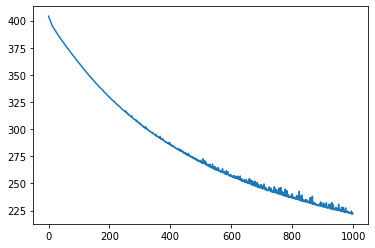

In [205]:
mySVM  = SVM()
xp, yp  = get_data_pair(data[0],data[1])
w,b,loss  = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
plt.plot(loss)
plt.show()

In [206]:
def train_model(x,y):
    svm_classifier= {}
    for i in range(no_of_classes):
        svm_classifier[i] = {}
        for j in range(i+1,no_of_classes):
            xpair,ypair = get_data_pair(data[i],data[j])
            wts,b,loss = mysvm.fit(xpair,ypair,learning_rate=0.000001,maxItr=500)
            svm_classifier[i][j] = (wts,b)
            plt.plot(loss)
            plt.show()
    return svm_classifier

404.0
404.0
403.9268518118588
403.8537040965305
403.7805568897057
403.707410016337
403.63426356731014
403.5611176486533
403.4879723553271
403.41482715916027
403.341682577532
403.2685386722406
403.1953949434542
403.1222516243628
403.0491088603181
402.97596655277795
402.90282462263065
402.8296829410902
402.75654196786417
402.6834012346713
402.6102609929649
402.5371210731888
402.46398180902537
402.39084286669276
402.3177040972406
402.24456611763026
402.171428508925
402.09829106372825
402.02515442433315
401.95201817012185
401.8788824502367
401.80574709874384
401.73261190000125
401.6594774207558
401.58634326437516
401.5132095277911
401.4400762266008
401.36694326403585
401.29381099722906
401.2206791379605
401.1475477920846
401.07441675339726
401.00128624467993
400.9281559875489
400.85502622315846
400.78189692886906
400.70876815802563
400.6356397371195
400.56251182565774
400.4893843758185
400.41625732886274
400.34313064176587
400.2700042880678
400.1968785927328
400.12375326304686
400.05062825

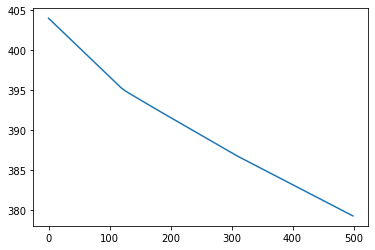

404.0
404.0
403.53224298305827
403.0644893031705
402.5967381018472
402.12899016290606
401.66124472995364
401.193501948257
400.72576156879734
400.2580250155557
399.79029060397744
399.3225594775118
398.85483087253346
398.3871051191693
397.9193818903188
397.45166181760885
396.9839447848043
396.516230135272
396.0485185538402
395.58080949015743
395.1131032552376
394.6453994623208
394.1776988801398
393.710000843792
393.2423053505979
392.77461262085586
392.30692324195024
391.83923682102596
391.3715525873383
390.90387262125824
390.4361941999301
389.96851890653375
389.5008459600538
389.0331756899526
388.5655095820396
388.0978451873958
387.63018355666856
387.1625255735583
386.6948692925104
386.2272160161375
385.7595656027178
385.2919185261187
384.850803386568
384.4750101098619
384.1399165053377
383.83605024583716
383.57158273471293
383.31763882748646
383.07456253833743
382.827285606535
382.615294777618
382.43474883497976
382.24670986949275
382.0803689708603
381.900558760401
381.73258310237907
38

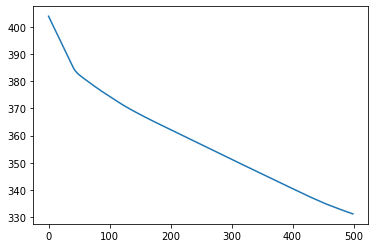

404.0
404.0
403.5975162996191
403.19503550596966
402.79255655893826
402.39008018336614
401.987606379511
401.5851341395885
401.18266547936975
400.7801978590938
400.3777335013839
399.9752715792077
399.5728120369757
399.1703546327799
398.7678997763628
398.3654474810174
397.9629979790002
397.56055041653786
397.15810566708547
396.75566307086297
396.35322353337205
395.9507857156507
395.54835046632627
395.1459176382145
394.74348749070475
394.34105944085417
393.93863381667245
393.5362107147996
393.13378997308445
392.7313714705727
392.32895576902916
391.92654215780175
391.52413068023316
391.1217220948465
390.7193162312529
390.31691182767713
389.91451041847876
389.5121107557722
389.10971407059503
388.7073200453846
388.30492777102836
387.91595870295356
387.6595633633375
387.43252626260664
387.2649287151003
387.11256458444797
386.95507420935513
386.8035944414803
386.6515952839118
386.50011736186156
386.3486403589437
386.1971642897922
386.0456889939443
385.8942146867335
385.74274129521245
385.59126

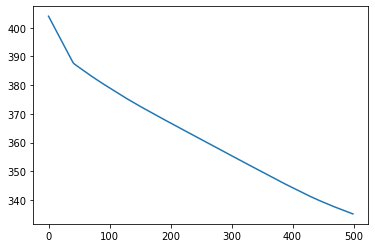

404.0
404.0
403.64529517604467
403.2905923551383
402.93589225081416
402.58119372691164
402.2264976406318
401.8718036243243
401.5171122478304
401.1624223989958
400.80773465573486
400.453049063227
400.0983657580729
399.74368419060374
399.389005307684
399.0343284871666
398.67965362766097
398.3249806113867
397.9703100577478
397.61564121777036
397.2609750419597
396.9063106097398
396.5516483917661
396.1969886437519
395.842330515947
395.4876746976822
395.1330210569537
394.7783695949075
394.42372003123
394.0690726856506
393.71442761666464
393.35978487678153
393.00514440221065
392.65050593050296
392.2958692871596
391.9412347135507
391.58660222065765
391.231972152852
390.87734425805735
390.522718587255
390.168094685589
389.8134728440419
389.45885300392086
389.10423554526585
388.74962017822554
388.39500719120576
388.04039638716966
387.68578763361216
387.3311806691137
386.9765759345146
386.6219736582283
386.26737350122573
385.9127751932981
385.55817886531037
385.2035846474016
384.84899257825924
38

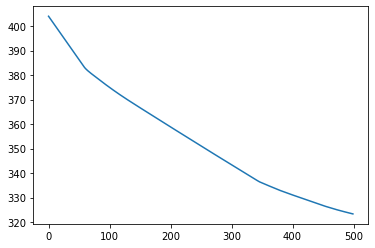

404.0
404.0
403.63508391530627
403.2701706570597
402.90525967916267
402.54035081234395
402.17544373552613
401.81053895370883
401.4456358199551
401.08073522065166
400.71583709143505
400.35094126725267
399.9860475175522
399.621156120739
399.2562665544966
398.8913795021641
398.52649439066863
398.16161142277303
397.7967306962445
397.431852431981
397.0669760599088
396.70210193080976
396.33722993497327
395.97236003834786
395.60749258616306
395.2426270967737
394.87776385034357
394.5129026110601
394.1480438630835
393.7831870976869
393.41833254652414
393.0534798309582
392.6886298746415
392.32378198334936
391.95893632391085
391.59409278507934
391.22925167940525
390.864412745165
390.49957582409513
390.13474086286436
389.76990854732475
389.4050780915053
389.040249888395
388.6754236033698
388.31059976774355
387.94577786207583
387.5809585584926
387.2161414214487
386.85132674998073
386.48651400878083
386.121703291887
385.75689460618753
385.3920882405768
385.02728418889853
384.66248214450314
384.29768

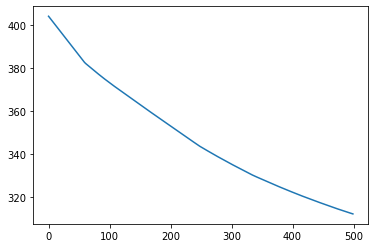

404.0
404.0
403.5758941200965
403.15179091601453
402.72769022887064
402.30359210845387
401.8794965396836
401.4554035192423
401.031313061089
400.6072249682086
400.183139693888
399.75905679925205
399.33497640613507
398.9108986103488
398.48682337503084
398.0627505931492
397.63868033555894
397.2146125873308
396.7905474230213
396.3664848522555
395.9424249687079
395.5183675325619
395.0943127037038
394.6702603966752
394.24621056059715
393.8221633517123
393.39811864332927
392.97407644661536
392.5500367589051
392.1259996857713
391.70196525271007
391.27793332221574
390.8539039171306
390.4298770222157
390.0058526500293
389.5818308596565
389.15781159782534
388.73379487836525
388.30978060487575
387.8857689894278
387.46175990578456
387.0377533953196
386.6137494231037
386.18974806827543
385.76574911152926
385.34175276479743
384.91775891298715
384.49376757280885
384.0697787840032
383.6457925793903
383.2218089644306
382.79782785447304
382.3738492648232
381.9498732373068
381.525899813229
381.10192882676

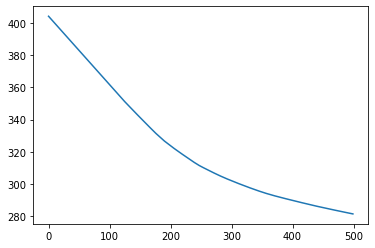

In [207]:
svm_classifier = train_model(image_data,labels)

In [208]:
cats_dogs=svm_classifier[0][1]


In [209]:
print(cats_dogs[0])#wts


[[-0.00233291 -0.00318254 -0.00408847 ... -0.00267856 -0.00179468
  -0.00216655]]


In [210]:
print(cats_dogs[1])#bias

-0.0015249999999999994


In [211]:
horse_humans=svm_classifier[2][3]


In [212]:
print(horse_humans[0])#wts

[[0.00451655 0.00258825 0.00242498 ... 0.00520377 0.00600401 0.01218101]]


In [213]:
print(horse_humans[1])#bias

0.002088999999999998


### Prediction

In [214]:
def binary_predict(x,w,b):
    z = np.dot(x,w.T)+b
    if z>=0:
        return 1
    else:
        return -1

In [215]:
def predict(x):
    count = np.zeros((no_of_classes,))
    for i in range(no_of_classes):
        for j in range(i+1,no_of_classes):
            w,b = svm_classifier[i][j]
            
            z = binary_predict(x,w,b)
            if (z==1):
                count[j] += 1
            else:
                count[i] += 1
    final_prediction = np.argmax(count)
    return final_prediction

In [216]:
predict(image_data[0])

2

In [217]:
print(labels[0])

0


In [218]:
def accuracy(x,y):
    count = 0
    for i in range(x.shape[0]):
        predict_value = predict(x[i])
        if (predict_value==y[i]):
            count += 1
    return count/x.shape[0]    

In [219]:
accuracy(image_data,labels)

0.4034653465346535

## SVM Using Sklearn

In [220]:
from sklearn import svm

In [221]:
svm_classifier = svm.SVC(kernel = 'linear',C=1.0)#c is penalty

In [222]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.6262376237623762

In [223]:
svm_classifier = svm.SVC(kernel = 'rbf',C=1.0)#c is penalty

In [224]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.6027227722772277